<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/Portfolio_Optimization_In_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 6.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22615 sha256=2a9a7a5368394fb250ffbddd43a2c9b8b69870ef72935e3671d7a68be4e9081e
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline  

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/nasdaq-listed_csv.csv')

In [7]:
symbols = ['GOOGL', 'TSLA', 'FB', 'AMZN', 'AAPL', 'MSFT', 'VOD',  'ADBE', 'NVDA', 'CRM' ]
 
all_stocks = pd.DataFrame()
 
for symbol in symbols:
    tmp_close = yf.download(symbol, 
                      start='2019-11-07', 
                      end='2020-11-07', 
                      progress=False)['Close']
    all_stocks = pd.concat([all_stocks, tmp_close], axis=1)
 
all_stocks.columns=symbols
all_stocks

,GOOGL,TSLA,FB,AMZN,AAPL,MSFT,VOD,ADBE,NVDA,CRM
2019-11-07,1306.939941,67.108002,190.419998,1788.199951,64.857498,144.259995,20.910000,290.769989,208.339996,159.500000
2019-11-08,1309.000000,67.428001,190.839996,1785.880005,65.035004,145.960007,20.680000,292.459991,207.779999,161.110001
2019-11-11,1298.280029,69.017998,189.610001,1771.650024,65.550003,146.110001,20.540001,290.269989,208.179993,161.779999
2019-11-12,1297.209961,69.986000,194.470001,1778.000000,65.489998,147.070007,21.250000,291.720001,209.610001,162.860001
2019-11-13,1296.180054,69.222000,193.190002,1753.109985,66.117500,147.309998,21.110001,293.540009,208.570007,162.600006
...,...,...,...,...,...,...,...,...,...,...
2020-11-02,1624.319946,400.510010,261.359985,3004.479980,108.769997,202.330002,13.810000,444.940002,503.230011,232.449997
2020-11-03,1645.660034,423.899994,265.299988,3048.409912,110.440002,206.429993,13.920000,454.019989,520.780029,237.130005
2020-11-04,1745.849976,420.980011,287.380005,3241.159912,114.949997,216.389999,13.900000,487.230011,551.770020,250.740005
2020-11-05,1762.500000,438.089996,294.679993,3322.000000,119.029999,223.289993,14.110000,496.470001,566.400024,260.220001


In [8]:
returns = np.log(all_stocks/all_stocks.shift(1)).dropna(how="any")
returns

,GOOGL,TSLA,FB,AMZN,AAPL,MSFT,VOD,ADBE,NVDA,CRM
2019-11-08,0.001575,0.004757,0.002203,-0.001298,0.002733,0.011715,-0.011060,0.005795,-0.002692,0.010043
2019-11-11,-0.008223,0.023307,-0.006466,-0.008000,0.007888,0.001027,-0.006793,-0.007516,0.001923,0.004150
2019-11-12,-0.000825,0.013928,0.025309,0.003578,-0.000916,0.006549,0.033983,0.004983,0.006846,0.006654
2019-11-13,-0.000794,-0.010976,-0.006604,-0.014098,0.009536,0.001630,-0.006610,0.006220,-0.004974,-0.001598
2019-11-14,0.009957,0.009318,-0.000207,0.000850,-0.006943,0.005078,-0.028834,0.003367,0.005832,0.002764
...,...,...,...,...,...,...,...,...,...,...
2020-11-02,0.005067,0.031630,-0.006673,-0.010486,-0.000827,-0.000692,0.021963,-0.004843,0.003723,0.000775
2020-11-03,0.013052,0.056759,0.014963,0.014516,0.015237,0.020061,0.007934,0.020202,0.034280,0.019933
2020-11-04,0.059100,-0.006912,0.079944,0.061311,0.040025,0.047121,-0.001438,0.070595,0.057804,0.055808
2020-11-05,0.009492,0.039839,0.025085,0.024636,0.034878,0.031389,0.014995,0.018787,0.026169,0.037111


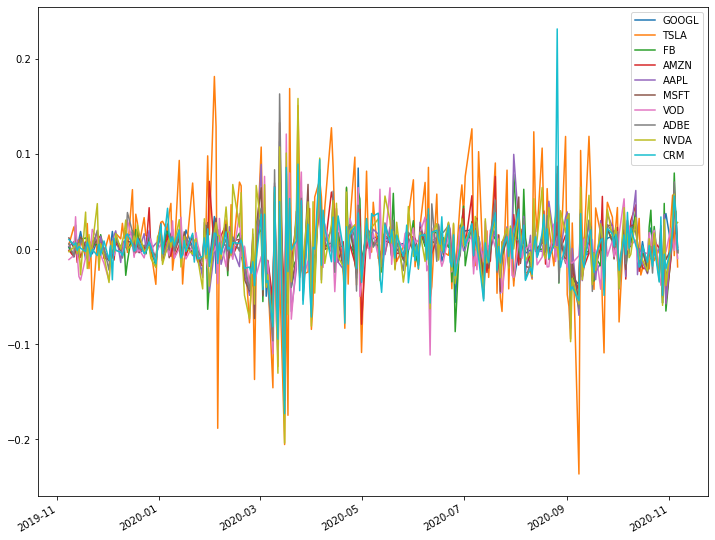

In [9]:
returns.plot(figsize=(12,10))

In [10]:
# mean daily returns per stock 
returns.mean()

GOOGL    0.001180
TSLA     0.007370
FB       0.001716
AMZN     0.002445
AAPL     0.002398
MSFT     0.001741
VOD     -0.001600
ADBE     0.002108
NVDA     0.004080
CRM      0.001941
dtype: float64

In [11]:
# mean daily returns of all stocks
returns.mean().mean()

0.0023379879443287807

In [12]:
# the objective function is to minimize the portfolio risk
def objective(weights): 
    weights = np.array(weights)
    return weights.dot(returns.cov()).dot(weights.T)
 
 
 
# The constraints
cons = (# The weights must sum up to one.
        {"type":"eq", "fun": lambda x: np.sum(x)-1}, 
        # This constraints says that the inequalities (ineq) must be non-negative.
        # The expected daily return of our portfolio and we want to be at greater than 0.003
        {"type": "ineq", "fun": lambda x: np.sum(returns.mean()*x)-0.003}) 
 
 
# Every stock can get any weight from 0 to 1
bounds = tuple((0,1) for x in range(returns.shape[1])) 
 
# Initialize the weights with an even split
# In out case each stock will have 10% at the beginning
guess = [1./returns.shape[1] for x in range(returns.shape[1])]
 
 
optimized_results = minimize(objective, guess, method = "SLSQP", bounds=bounds, constraints=cons)
optimized_results

     fun: 0.0007653041354494076
     jac: array([0.00113867, 0.00238262, 0.00128105, 0.00102784, 0.0013817 ,
       0.00138097, 0.00098137, 0.00145241, 0.0017508 , 0.00145306])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.08350211, 0.17207713, 0.09109819, 0.10191619, 0.10089445,
       0.09138983, 0.04341388, 0.09662125, 0.12486846, 0.0942185 ])

In [13]:
optimized_results.x

array([0.08350211, 0.17207713, 0.09109819, 0.10191619, 0.10089445,
       0.09138983, 0.04341388, 0.09662125, 0.12486846, 0.0942185 ])

In [14]:
# we get 1
np.sum(optimized_results.x)

1.0

In [15]:
np.sum(returns.mean()*optimized_results.x)

0.003000000000046344

In [16]:
pd.DataFrame(list(zip(symbols, optimized_results.x)), columns=['Symbol', 'Weight'])

,Symbol,Weight
0,GOOGL,0.083502
1,TSLA,0.172077
2,FB,0.091098
3,AMZN,0.101916
4,AAPL,0.100894
5,MSFT,0.091390
6,VOD,0.043414
7,ADBE,0.096621
8,NVDA,0.124868
9,CRM,0.094219
